<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2024</h1>
    <h3>Clase 2</h3>
    <h5>Ejercitacion asincronica</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistente: Sebastián Calcagno y Braian Drago<p>
</div>

 <h1>Esta actividad asincrónica se segmentará en dos partes. La primera implicará la interpretación de gráficos de autocorrelación, mientras que en la segunda abordaremos un ejemplo seleccionado por usted, en el cual trabajarán con algunos enunciados.</h1>

In [ ]:
# IMPORTAR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller

 <h2> PRIMERA PARTE</h2>

<li type="square">Primera parte - ej - 1) Ejecutar los dos códigos a continuación y luego determinar en cada caso, en base a la grafica de autocorrelación, si las series son o no estacionarias. ( RECORDANDO QUE: En este ejercicio sera "unicamente" la interpretacion mediante graficos, pero completo y que se abordara en la proxima clase es confirmar mediante tests las interpretaciones graficas. )</li>

 <h3> CODIGO 1 </h3>

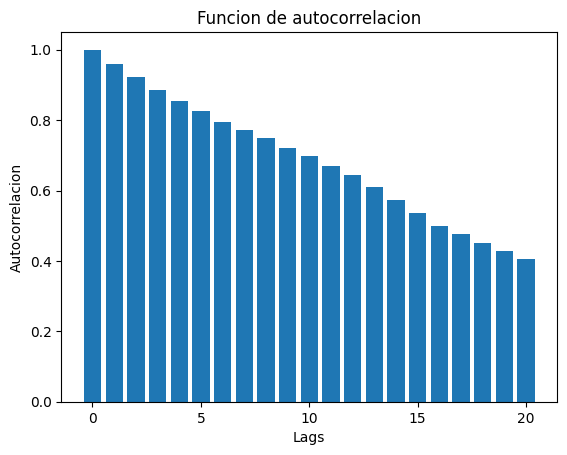

In [ ]:
# CORRER EL CODIGO

# Simulacion de serie 1
np.random.seed(0)
tiempo = np.arange(0, 100)
estacionalidad = 10 * np.sin(2 * np.pi * tiempo / 12)
data_codigo_1 = 2 * tiempo + estacionalidad + np.random.randn(100) * 5

# Calculo de la función de autocorrelación
lags_maximos = 20
autocorr = acf(data_codigo_1, nlags=lags_maximos)

# Graficar de la función de autocorrelación
plt.bar(range(lags_maximos+1), autocorr)
plt.xlabel('Lags')
plt.ylabel('Autocorrelacion')
plt.title('Funcion de autocorrelacion')
plt.show()

In [ ]:
''' Escribir aqui la respuesta (¿ es o no es estacionaria? - JUSTIFICAR)






'''

Basándome en este gráfico de autocorrelación, la serie temporal no parece ser estacionaria. Aquí están las razones:

1. Decaimiento lento: La función de autocorrelación muestra un decaimiento muy lento y gradual. En una serie estacionaria, esperaríamos ver un decaimiento más rápido hacia cero.
2. Valores altos y persistentes: Las autocorrelaciones permanecen significativamente por encima de cero incluso para lags altos (hasta el lag 20 mostrado en el gráfico). Esto sugiere una fuerte dependencia a largo plazo en la serie.
3. Ausencia de corte abrupto: No hay un punto claro donde las autocorrelaciones caigan abruptamente y se mantengan cerca de cero, lo cual sería característico de una serie estacionaria.
4. Patrón lineal: El decaimiento de las autocorrelaciones parece seguir un patrón casi lineal, lo cual es típico de series no estacionarias, especialmente aquellas con tendencias.
5. Valores altos en lags iniciales: Los valores de autocorrelación son muy altos para los primeros lags, indicando una fuerte persistencia en la serie.

Estas características sugieren que la serie temporal probablemente tiene una tendencia o una raíz unitaria, lo que la hace no estacionaria. Para trabajar con modelos ARIMA o similares, normalmente se recomendaría diferenciar la serie (posiblemente una o más veces) para hacerla estacionaria antes de modelarla.
Para confirmar la no estacionariedad, sería útil realizar pruebas estadísticas formales como la prueba de Dickey-Fuller Aumentada (ADF) o la prueba de KPSS, además de examinar la serie original y sus diferencias.

 <h3> CODIGO 2 </h3>

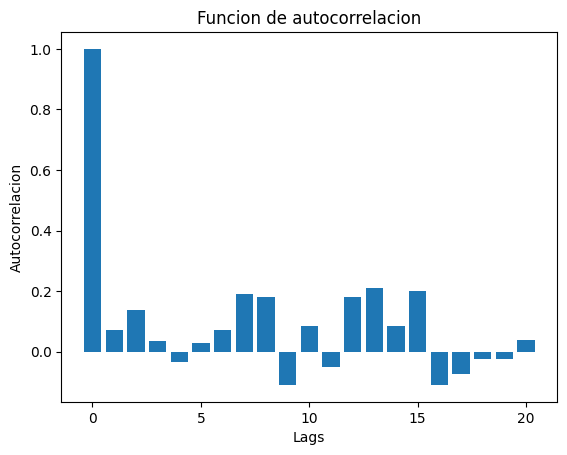

In [ ]:
# CORRER EL CODIGO

# Simulacion de serie 2
np.random.seed(0)
data = np.random.randn(100)

# Calculo de la función de autocorrelación
autocorr = acf(data, nlags=lags_maximos)

# Graficar de la función de autocorrelación
plt.bar(range(lags_maximos+1), autocorr)
plt.xlabel('Lags')
plt.ylabel('Autocorrelacion')
plt.title('Funcion de autocorrelacion')
plt.show()

In [ ]:
''' Escribir aqui la respuesta (¿ es o no es estacionaria? - JUSTIFICAR)






'''

Basándome en este gráfico de autocorrelación, la serie temporal parece ser más estacionaria que la mostrada en la imagen anterior. Aquí están las razones:

1. Decaimiento rápido: La función de autocorrelación muestra un decaimiento muy rápido después del lag 0. Esto es característico de series estacionarias.
2. Valores cercanos a cero: Después del lag 0, la mayoría de las autocorrelaciones están cerca de cero, fluctuando alrededor de este valor.
3. Ausencia de patrón sistemático: No se observa un patrón claro o sistemático en las autocorrelaciones después del lag 0, lo cual es típico de series estacionarias.
4. Falta de persistencia: No hay una persistencia clara en los valores de autocorrelación para lags más altos, lo que sugiere que no hay una tendencia fuerte o una raíz unitaria.
5. Valores dentro de los límites de significancia: Aunque no se muestran explícitamente, la mayoría de las autocorrelaciones parecen estar dentro de lo que serían los límites de significancia estadística (generalmente alrededor de ±0.2 para muestras grandes).

Sin embargo, hay algunos puntos a considerar:

* Hay algunos picos en lags específicos (como 7, 13, 15) que podrían indicar alguna estructura residual, posiblemente estacional o cíclica.
* El valor en el lag 1 es notablemente más alto que los demás, lo que podría sugerir alguna dependencia a corto plazo.

En general, este gráfico de autocorrelación sugiere que la serie es mayormente estacionaria, especialmente en comparación con la serie mostrada en la imagen anterior. No obstante, para una conclusión definitiva, sería recomendable:
1. Realizar pruebas estadísticas formales como la prueba de Dickey-Fuller Aumentada (ADF) o la prueba de KPSS.
2. Examinar la serie original y sus diferencias.
3. Considerar la posibilidad de una estructura ARMA de bajo orden o algún componente estacional.

En resumen, basándonos únicamente en este gráfico de autocorrelación, la serie parece ser estacionaria, pero con algunas características que merecen un análisis más detallado.


 <h2> SEGUNDA PARTE</h2>

 Buscar un data set público de interés, descargarlo, importarlo y seguir las consignas.

<li type="square">1) Leer la base y configurar la/s variables de interes como serie/s de tiempo.</li>

In [ ]:
# escriba aqui su codigo
df = pd.read_csv('historico2.csv', sep=',')

df.rename(columns={'Date': 'Fecha','Tasa de política monetaria':'Tasa'}, inplace=True)
df = df[['Fecha','Tasa']]

#df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y%m%d', errors='coerce')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Tasa'] = df['Tasa'].str.replace(',', '.').astype(float)
df.set_index('Fecha', inplace=True)

df.head()


,Tasa
Fecha,
2016-01-04,33.0
2016-01-05,33.0
2016-01-06,32.0
2016-01-07,32.0
2016-01-08,32.0




<li type="square">2) Graficar la/s variable/s en el tiempo.</li>

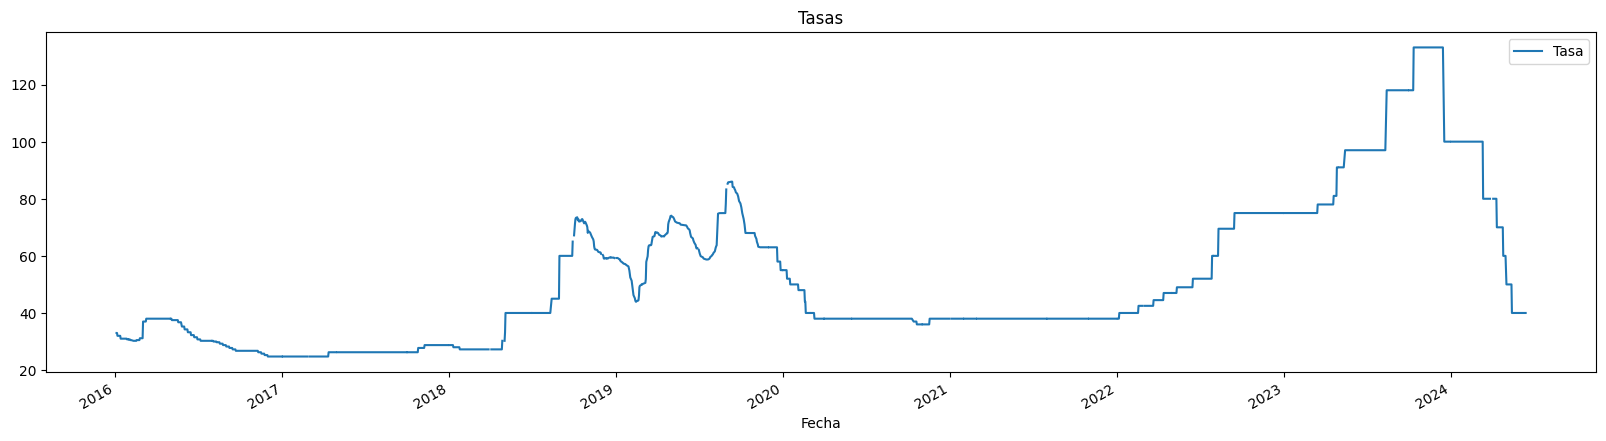

In [ ]:
# escriba aqui su codigo
import matplotlib.pyplot as plt

df.plot(figsize=(20,5), title = "Tasas")
plt.show()

In [ ]:
# Contar la cantidad de registros por año
df_aux = pd.read_csv('historico2.csv', sep=',')

df_aux.rename(columns={'Date': 'Fecha','Tasa de política monetaria':'Tasa'}, inplace=True)
df_aux = df_aux[['Fecha','Tasa']]
df_aux['Fecha'] = pd.to_datetime(df_aux['Fecha'])
cantidades = df_aux.groupby(df['Fecha'].dt.year).size()

# Mostrar el resultado
print(cantidades)

Fecha
2016    251
2017    250
2018    248
2019    248
2020    245
2021    249
2022    248
2023    246
2024    112
dtype: int64


In [ ]:
# Calcular el promedio de la columna "Tasa", omitiendo NaN
promedio_tasa = df['Tasa'].mean()

# Llenar los NaN con el promedio
df['Tasa'].fillna(promedio_tasa, inplace=True)


<ipython-input-26-98927a5afa16>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tasa'].fillna(promedio_tasa, inplace=True)


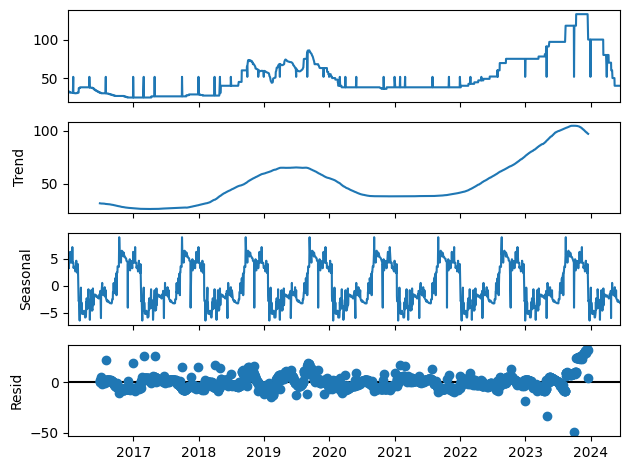

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df, model='additive', period=242)

'''
"period=252" indica un ciclo completo anual basado en los días hábiles del mercado, que se usa con frecuencia en series temporales financieras.
'''

# Graficar los resultados
result.plot()
plt.show()

<li type="square">3) Graficar el Correlograma y analizar su comportamiento.</li>

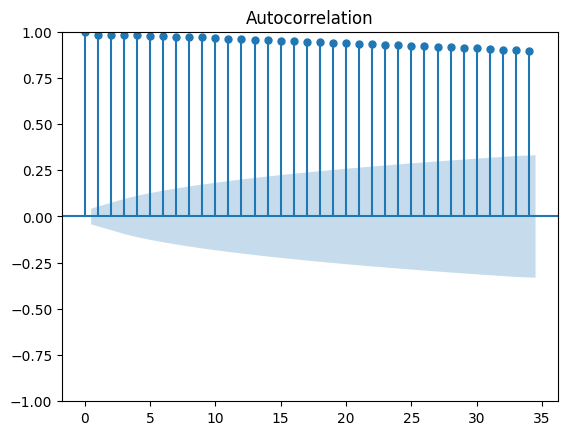

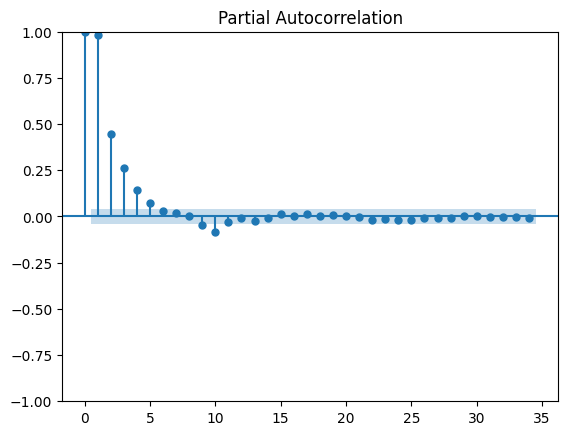

In [ ]:
# escriba aqui su codigo

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Codigo para funcion de autocorrelacion y autocorrelacion parcial
plot_acf(df);
plot_pacf(df);



In [ ]:
'''
Analize brevemente aqui el comportamiento









'''

# Grafico de autocorrelacion

Basándome en este gráfico de autocorrelación (ACF) para la tasa de plazo fijo desde 2016 a 2024, puedo ofrecer la siguiente interpretación:

Alta persistencia:

Las autocorrelaciones se mantienen muy altas y positivas para todos los rezagos mostrados.
Esto indica una fuerte persistencia en la serie temporal, donde los valores pasados tienen una influencia significativa y duradera sobre los valores futuros.


Decaimiento muy lento:

La ACF muestra un decaimiento extremadamente lento, casi imperceptible a lo largo de los 35 rezagos mostrados.
Este patrón es característico de series no estacionarias, particularmente aquellas con tendencias fuertes o raíces unitarias.


Ausencia de estacionalidad clara:

No se observan patrones cíclicos o estacionales evidentes en la ACF.


Posible integración:

El lento decaimiento sugiere que la serie podría estar integrada, es decir, que necesita ser diferenciada para alcanzar la estacionariedad.


Fuerte autocorrelación en todos los rezagos:

Prácticamente todas las autocorrelaciones están fuera de los límites de confianza (área sombreada), indicando que son estadísticamente significativas.


Posible tendencia:

El patrón de la ACF es consistente con una serie que tiene una fuerte tendencia a lo largo del tiempo.



Conclusiones y recomendaciones:

La serie temporal de la tasa de plazo fijo parece ser no estacionaria.
Es probable que se necesite diferenciar la serie al menos una vez para alcanzar la estacionariedad.
Un modelo ARIMA con un componente integrado (d>0) podría ser apropiado, por ejemplo, ARIMA(p,1,q) o incluso ARIMA(p,2,q).
Sería recomendable:

Aplicar una o más diferenciaciones a la serie y volver a examinar la ACF.
Realizar pruebas de raíz unitaria (como la prueba de Dickey-Fuller aumentada) para confirmar la no estacionariedad.
Examinar gráficamente la serie original para identificar tendencias visibles.
Considerar la posibilidad de que factores económicos externos estén influyendo en la persistencia de las tasas de plazo fijo.



Esta ACF sugiere que la tasa de plazo fijo ha tenido un comportamiento muy persistente y posiblemente con tendencia a lo largo del período analizado. Esto podría reflejar políticas monetarias consistentes, condiciones económicas estables o cambios graduales pero sostenidos en el entorno financiero durante este período.

# Grafico de autocorrelacion parcial

Basándome en el gráfico de autocorrelación parcial (PACF) que has proporcionado para la tasa de plazo fijo desde 2016 a 2024, puedo ofrecerte la siguiente interpretación:

Correlación significativa en los primeros rezagos:

Hay una fuerte correlación parcial en los primeros 2-3 rezagos, especialmente en el rezago 1 y 2.
Esto sugiere que la tasa de plazo fijo de un mes está fuertemente influenciada por las tasas de los 1-2 meses inmediatamente anteriores.


Decaimiento rápido:

Después de los primeros rezagos, la autocorrelación parcial disminuye rápidamente.
Esto indica que la influencia directa de los valores pasados más allá de 2-3 meses es mucho menor.


Fluctuaciones alrededor de cero:

Después del rezago 5 aproximadamente, las autocorrelaciones parciales fluctúan cerca de cero.
Esto sugiere que no hay una influencia significativa de rezagos más lejanos una vez que se han considerado los primeros rezagos.


Ausencia de patrones cíclicos claros:

No se observan picos significativos en intervalos regulares, lo que indica que no hay una fuerte estacionalidad en la serie.


Posible modelo AR(2) o AR(3):

La estructura de la PACF sugiere que un modelo autorregresivo de orden 2 o 3 (AR(2) o AR(3)) podría ser apropiado para modelar esta serie temporal.


Estacionariedad:

El rápido decaimiento de la PACF es consistente con una serie estacionaria o que se ha vuelto estacionaria después de alguna transformación (como diferenciación).



Conclusiones y recomendaciones:

La tasa de plazo fijo parece tener una memoria corta, siendo influenciada principalmente por sus valores más recientes.
Un modelo ARIMA con componentes autorregresivos de orden bajo (como ARIMA(2,0,0) o ARIMA(3,0,0)) podría ser adecuado para modelar y pronosticar esta serie.
Sería útil comparar este PACF con el ACF (función de autocorrelación) para tener una visión más completa y determinar si se necesitan componentes de media móvil en el modelo.
Aunque no hay evidencia clara de estacionalidad, podría ser útil verificar si existen patrones anuales o de otro período que no sean evidentes en este gráfico.

Esta interpretación proporciona una base para el modelado de la serie temporal de la tasa de plazo fijo, pero siempre es recomendable combinar este análisis con otras técnicas y consideraciones económicas para obtener un modelo robusto y preciso.


<li type="square">4) Realizar Estadística Descriptiva de la/s variable/s.</li>

In [ ]:
# escriba aqui su codigo


# Calcular estadística descriptiva
df.describe()


,Tasa
count,2097.000000
mean,51.575898
std,25.422496
min,24.750000
25%,36.000000
50%,40.000000
75%,68.000000
max,133.000000


In [ ]:
'''
Escriba aqui los analisis







'''

Estadística Descriptiva
Conteo (count):

Valor: 2097
Interpretación: Hay 2097 observaciones (registros) en tu conjunto de datos, lo que sugiere que has recopilado una cantidad considerable de datos sobre las tasas de plazo fijo desde 2016 hasta 2024.
Media (mean):

Valor: 51.58
Interpretación: La tasa promedio de plazo fijo en el período analizado es del 51.58%. Esto te da una idea general de la rentabilidad de las inversiones en plazo fijo a lo largo de estos años.
Desviación estándar (std):

Valor: 25.42
Interpretación: La desviación estándar es relativamente alta en comparación con la media. Esto indica que hay una variabilidad significativa en las tasas de plazo fijo. En otras palabras, las tasas individuales tienden a diferir bastante de la media.
Mínimo (min):

Valor: 24.75
Interpretación: La tasa más baja registrada en este período es del 24.75%. Esto puede reflejar condiciones económicas o políticas que afectaron la rentabilidad de los depósitos a plazo fijo.
Percentiles (25%, 50%, 75%):

25% (Q1): 36.00
Interpretación: El 25% de las tasas de plazo fijo son iguales o inferiores al 36%. Esto indica que una parte significativa de las tasas están por debajo de este nivel, lo que podría ser un indicativo de tasas más bajas durante ciertos períodos.
50% (Q2 o mediana): 40.00
Interpretación: La mediana es del 40%, lo que significa que la mitad de las tasas son inferiores a este valor. Esto puede indicar que aunque la media es alta, la mitad de las observaciones están por debajo de un nivel relativamente bajo.
75% (Q3): 68.00
Interpretación: El 75% de las tasas son iguales o inferiores al 68%. Esto sugiere que las tasas más altas son menos comunes, pero cuando ocurren, pueden ser significativamente más altas que la media.
Máximo (max):

Valor: 133.00
Interpretación: La tasa más alta registrada es del 133%. Esto es inusualmente alto y puede ser indicativo de condiciones excepcionales en el mercado, posiblemente en respuesta a crisis económicas o políticas.
Conclusiones Generales
Volatilidad: La alta desviación estándar sugiere que las tasas de plazo fijo han sido muy volátiles, con periodos de tasas muy bajas y otros de tasas muy altas.
Tendencias: La media, aunque alta, puede ser influenciada por las observaciones extremas, como el máximo. Esto podría indicar que en ciertos periodos, las tasas subieron drásticamente, posiblemente como respuesta a cambios en la política monetaria o inflación.
Distribución: Dada la diferencia entre la media (51.58%) y la mediana (40.00%), es probable que la distribución de las tasas esté sesgada hacia la derecha, lo que significa que hay algunas tasas extremadamente altas que están elevando la media.

FIN DEL EJERCICIO - GRACIAS